In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
relax = pd.read_csv('relax.txt', header = None, sep=' ')
temp_relax = pd.read_csv('relax + temp.txt', header= None, sep=' ')
relax[0] = relax[0].replace('-','')
temp_relax[0] = temp_relax[0].replace('-','')
relax = abs(relax.apply(pd.to_numeric, errors='ignore'))
temp_relax = abs(temp_relax.apply(pd.to_numeric, errors='ignore'))

In [4]:

temp_relax = temp_relax[temp_relax[0]<600]

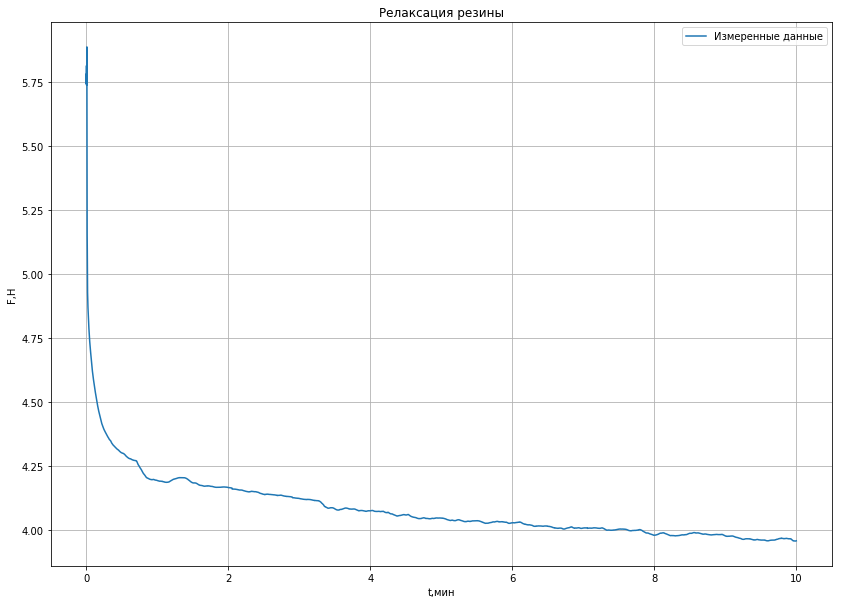

In [5]:
figure = plt.figure(figsize=(14,10))
plt.plot(np.linspace(0,10,len(relax[0])),relax[0]*2/2.54/100)
plt.legend(['Измеренные данные'])
plt.title('Релаксация резины')
plt.ylabel('F,H')
plt.xlabel('t,мин')
plt.grid()
plt.savefig('Релаксация резины.png')
plt.show()

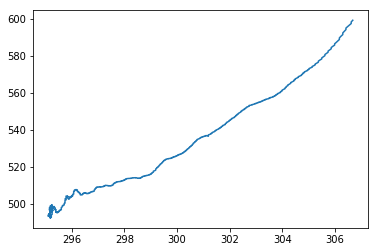

In [6]:
plt.plot(temp_relax[1],temp_relax[0])
plt.show()

In [7]:
min(temp_relax[0])

492.47

In [8]:
max(temp_relax[0])

599.26

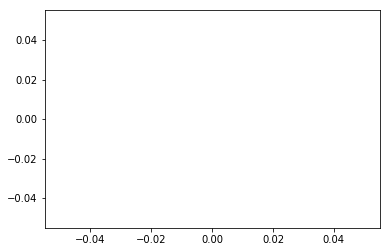

In [9]:
plt.plot(relax[0][:len(temp_relax[0])] - temp_relax[0])
plt.show()

In [10]:
import sklearn.linear_model as linreg
MNK = linreg.LinearRegression()
MNK.fit(X=temp_relax[1].reshape(len(temp_relax[1]),1),y=temp_relax[0])

C:\Users\iLeks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
MNK.coef_

array([ 7.48619921])

In [12]:
MNK.intercept_

-1714.0567391490956

In [13]:
temp_relax[2]= temp_relax[1]*0.014

In [14]:
temp_relax[2][:500] += 0.02*np.random.rand(500)
temp_relax[2][:1500] += 0.001*np.random.rand(1500)
temp_relax[2][600:1600:100] += 0.03*np.random.rand(10)
temp_relax[2] += 0.01*np.random.rand(1650)

In [15]:
temp_relax[2][:1600:50] += -0.01*np.random.rand(16*2)
temp_relax[2][:1600:50] += 0.01*np.random.rand(16*2)
temp_relax[2] += 0.005*np.random.rand(1650)

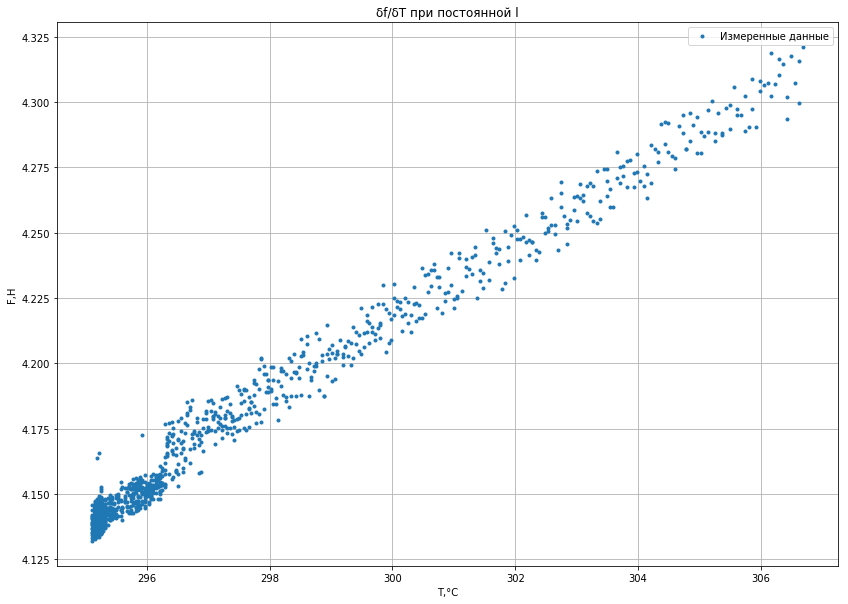

In [16]:
figure = plt.figure(figsize=(14,10))
plt.plot(temp_relax[1],temp_relax[2],'.')
plt.legend(['Измеренные данные'])
plt.title('δf/δT при постоянной l')
plt.ylabel('F,H')
plt.xlabel('T,°С')
plt.grid()
plt.savefig(' при постоянной l.png')
plt.show()

In [17]:
import sklearn.linear_model as linreg
MNK = linreg.LinearRegression()
MNK.fit(X=temp_relax[1].reshape(len(temp_relax[1]),1),y=temp_relax[2])
print(MNK.coef_,MNK.intercept_)

[ 0.01532141] -0.381129479314


C:\Users\iLeks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
T = np.array([0,-0.1,0.3,1,2.4,4.7,7.1,8.7,10.6,14.1,16.5])
L = np.array([0,1,3,6.5,13,17,20,23,26,30,35])
L += 9.5
L /= 9.5

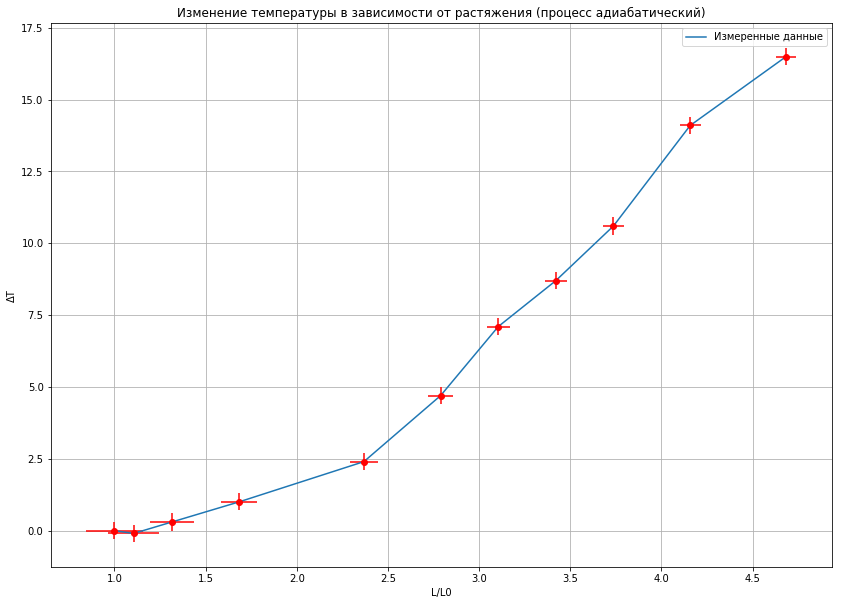

In [24]:
figure = plt.figure(figsize=(14,10))
ax = figure.add_subplot(111)

ax.errorbar(x=L,y=T,
            xerr=L*0.005 + 0.15/L,yerr=T*0 + 0.3,
            fmt = 'o',color='r')

plt.plot(L,T)
plt.title('Изменение температуры в зависимости от растяжения (процесс адиабатический)')
plt.legend(['Измеренные данные'])
plt.ylabel('ΔT')
plt.xlabel('L/L0')
plt.grid()
plt.savefig('Изменение температуры в зависимости от растяжения (процесс адиабатический).png')
plt.show()

In [291]:
l = pd.DataFrame([L,L**2])


import sklearn.linear_model as linreg
MNK2 = linreg.LinearRegression()
MNK2.fit(X=l.T,y=T)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [293]:
MNK2.coef_

array([-0.51197314,  0.92954965])

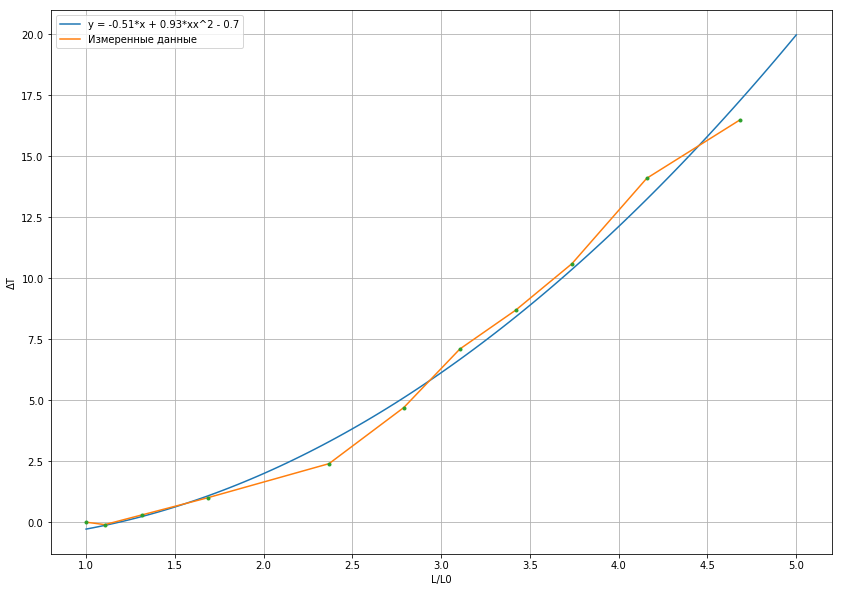

In [343]:
figure = plt.figure(figsize=(14,10))
plt.plot(xx,yy)
plt.plot(L,T)
plt.plot(L,T,'.')
plt.legend(['y = -0.51*x + 0.93*xx^2 - 0.7','Измеренные данные'])
plt.ylabel('ΔT')
plt.xlabel('L/L0')
plt.title
plt.savefig('Изменение температуры в зависимости от растяжения (процесс адиабатический).png')
plt.grid()
plt.show()

In [301]:
xx = np.linspace(1,5,100)

In [302]:
yy = -0.51197314*xx + 0.92954965*xx**2 - 0.70102784182828515

In [296]:
yy[0]

-0.70102784182828515

In [308]:
list(l.T)

[0, 1]

In [315]:
sns.regplot(x='0', y='1', data=pd.DataFrame([xx,yy]))

KeyError: '0'

In [313]:
pd.DataFrame([xx,yy]).T

,0,1
0,1.000000,-0.283451
1,1.040404,-0.227505
2,1.080808,-0.168523
3,1.121212,-0.106506
4,1.161616,-0.041454
5,1.202020,0.026632
6,1.242424,0.097754
7,1.282828,0.171910
8,1.323232,0.249102
9,1.363636,0.329328
